In [183]:
#Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання
import pandas as pd
%matplotlib inline
books = pd.read_csv("bestsellers with categories.csv")
print(books)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [2]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
num_nan = books.isna().sum(min_count=True)
print(num_nan)
print("No")

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
No


In [5]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
#Відповідь: Які є унікальні жанри?
un_gen = books["Genre"].unique()
print(un_gen)

['Non Fiction' 'Fiction']


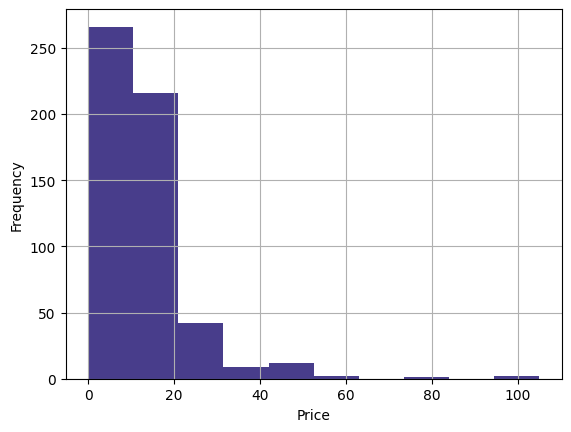

In [188]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt
import numpy as np
books["Price"].plot(kind = 'hist', color = "#483D8B")
plt.xlabel("Price")
plt.grid()
plt.show()

In [8]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
#Відповідь: Максимальна ціна?
print("Максимальна ціна:", books["Price"].max())
#Відповідь: Мінімальна ціна?
print("Мінімальна ціна:", books["Price"].min())
#Відповідь: Середня ціна?
print("Середня ціна:", books["Price"].mean())
#Відповідь: Медіанна ціна?
print("Медіанна ціна:", books["Price"].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [10]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
print("Мнайвищий рейтинг:", books["User Rating"].max())

Мнайвищий рейтинг: 4.9


In [13]:
#Відповідь: Скільки книг мають такий рейтинг? Відповідь:
print(books["Name"][books["User Rating"] == 4.9].count())

52


In [14]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь:
print(books[books["Reviews"] == books["Reviews"].max()])

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


In [19]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
books_2015 = books[books["Year"] == 2015]
print(books_2015[books_2015["Price"] == books_2015["Price"].max()])

                                                  Name  \
277  Publication Manual of the American Psychologic...   

                                 Author  User Rating  Reviews  Price  Year  \
277  American Psychological Association          4.5     8580     46  2015   

           Genre  
277  Non Fiction  


In [23]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
books_2010 = books[books["Year"] == 2010]
print(books_2010["Name"][books_2010["Genre"] == "Fiction"].count())

20


In [24]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
books_2010_2011 = books[books["Year"] == 2010|2011]
print(books_2010_2011["Name"][books_2010_2011["User Rating"] == 4.9].count())

1


In [29]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
books_2015_p = books_2015[books_2015["Price"]< 8]
books_2015_sort = books_2015_p.sort_values(by = 'Price').reset_index(drop = True)
print(books_2015_sort)

                                                 Name              Author  \
0                               To Kill a Mockingbird          Harper Lee   
1                       Laugh-Out-Loud Jokes for Kids         Rob Elliott   
2                          Knock-Knock Jokes for Kids         Rob Elliott   
3                                     First 100 Words        Roger Priddy   
4                                Giraffes Can't Dance       Giles Andreae   
5   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
6                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
7   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
8                         The Very Hungry Caterpillar          Eric Carle   
9   Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
10                       Baby Touch and Feel: Animals                  DK   
11                                   Love You Forever       Robert Munsch   

In [32]:
#Відповідь: Яка книга остання у відсортованому списку? Відповідь:
print(books_2015_sort.iloc[16])

Name           Old School (Diary of a Wimpy Kid #10)
Author                                   Jeff Kinney
User Rating                                      4.8
Reviews                                         6169
Price                                              7
Year                                            2015
Genre                                        Fiction
Name: 16, dtype: object


In [154]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
books_price = books.drop(['Reviews',"Year","User Rating","User Rating","Name","Author"], axis = 1)
print(books_price)
b1_min = books_price.groupby(["Genre"]).agg({"min"}).reset_index()
b1_max = books_price.groupby(["Genre"]).agg({"max"}).reset_index()
print(b1_min, b1_max)
#Відповідь: Максимальна ціна для жанру Fiction: Відповідь
print("Максимальна ціна для жанру Fiction: 82")
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
print("Мінімальна ціна для жанру Fiction: 0")
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
print("Максимальна ціна для жанру Fiction: 105")
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь
print("Мінімальна ціна для жанру Fiction: 0")

     Price        Genre
0        8  Non Fiction
1       22      Fiction
2       15  Non Fiction
3        6      Fiction
4       12  Non Fiction
..     ...          ...
545      8      Fiction
546      8  Non Fiction
547      8  Non Fiction
548      8  Non Fiction
549      8  Non Fiction

[550 rows x 2 columns]
         Genre Price
                 min
0      Fiction     0
1  Non Fiction     0          Genre Price
                 max
0      Fiction    82
1  Non Fiction   105
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Fiction: 105
Мінімальна ціна для жанру Fiction: 0


In [118]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

books_author_new = books.groupby('Author')['Author'].count().to_frame().rename(columns={'Author': 'Count'}).sort_values('Count')
print(books_author_new)
#Відповідь: Якої розмірності вийшла таблиця? Відповідь:
print("Розмір таблиці:", books_author_new.shape)
#Відповідь: Який автор має найбільше книг? Відповідь:
print(books_author_new.iloc[247])
print("Який автор має найбільше книг? Відповідь: Jeff Kinney")
#Відповідь: Скільки книг цього автора? Відповідь:
print("Скільки книг цього автора? Відповідь: 12")

                                    Count
Author                                   
Jill Twiss                              1
Patrick Thorpe                          1
Ian K. Smith M.D.                       1
Howard Stern                            1
Hopscotch Girls                         1
...                                   ...
American Psychological Association     10
Suzanne Collins                        11
Gary Chapman                           11
Rick Riordan                           11
Jeff Kinney                            12

[248 rows x 1 columns]
Розмір таблиці: (248, 1)
Count    12
Name: Jeff Kinney, dtype: int64
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [128]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
rat_authors = books.groupby('Author')['User Rating'].agg('mean').round(2).to_frame().sort_values(by = "User Rating")
print(rat_authors)
#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
print("У якого автора середній рейтинг мінімальний? Відповідь: Jill Twiss ")
#Відповідь: Який у цього автора середній рейтинг? Відповідь:
print("4.9")

                       User Rating
Author                            
Donna Tartt                    3.9
Gillian Flynn                  4.0
Muriel Barbery                 4.0
Gallup                         4.0
Chris Cleave                   4.1
...                            ...
Lin-Manuel Miranda             4.9
Emily Winfield Martin          4.9
Eric Carle                     4.9
Bill Martin Jr.                4.9
Jill Twiss                     4.9

[248 rows x 1 columns]


In [131]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
two_data_set = pd.concat([books_author_new, rat_authors], axis=1).sort_values(['Count', 'User Rating'])
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
print(two_data_set)
#Відповідь: Який автор перший у списку?
print("Який автор перший у списку? Відповідь: Muriel Barbery")

                                    Count  User Rating
Author                                                
Muriel Barbery                          1         4.00
Ian K. Smith M.D.                       1         4.10
Pierre Dukan                            1         4.10
Chris Cleave                            1         4.10
Geneen Roth                             1         4.20
...                                   ...          ...
American Psychological Association     10         4.50
Suzanne Collins                        11         4.66
Gary Chapman                           11         4.74
Rick Riordan                           11         4.77
Jeff Kinney                            12         4.80

[248 rows x 2 columns]
Muriel Barbery


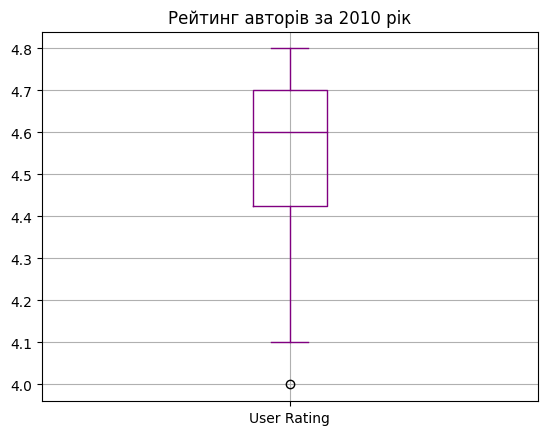

In [186]:
#додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.
import matplotlib.pyplot as plt
import numpy as np
books_2010["User Rating"].plot(kind = 'box', color = "#800080")
plt.title('Рейтинг авторів за 2010 рік', fontsize=12)
plt.grid()
plt.show()

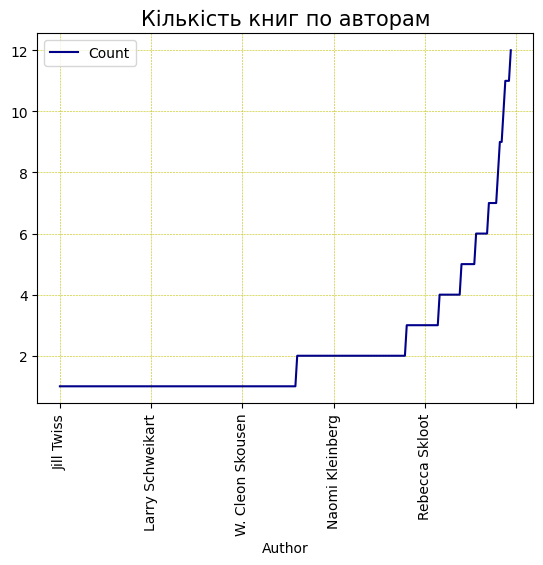

In [185]:
import matplotlib.pyplot as plt
import numpy as np
books_author_new.plot(color = "#00008B")
plt.xticks(rotation=90)
plt.title('Кількість книг по авторам', fontsize=15)
# plt.legend()
plt.grid(color='y', linestyle='--', linewidth=0.4)
plt.show()

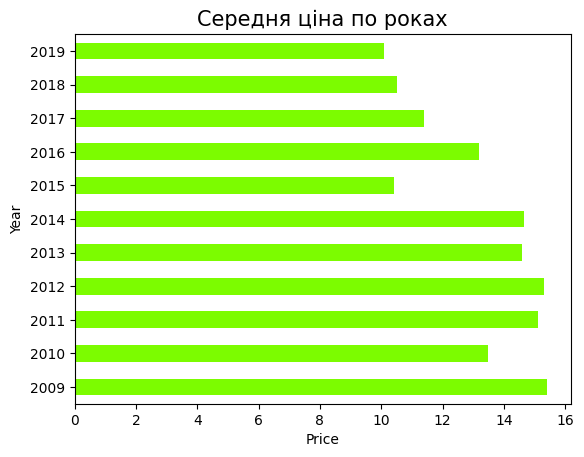

In [184]:
import matplotlib.pyplot as plt
import numpy as np
rat_authors = books.groupby('Year')['Price'].mean()
rat_authors.plot(kind = 'barh', color = "#7CFC00")
plt.xlabel("Price")
plt.title('Середня ціна по роках', fontsize=15)
plt.show()